In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1410,ham,Pls speak to that customer machan.,NaN,NaN,NaN
4795,spam,URGENT This is our 2nd attempt to contact U. Y...,NaN,NaN,NaN
2979,ham,What u mean u almost done? Done wif sleeping? ...,NaN,NaN,NaN
4966,spam,You can donate å£2.50 to UNICEF's Asian Tsunam...,NaN,NaN,NaN
828,ham,"Sorry light turned green, I meant another frie...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4975,ham,You are gorgeous! keep those pix cumming :) th...
3086,ham,So i asked how's anthony. Dad. And your bf
3460,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...
357,spam,Ur cash-balance is currently 500 pounds - to m...
5351,ham,Yup it's at paragon... I havent decided whethe...


In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3635,ham,\ME 2 BABE I FEEL THE SAME LETS JUST 4GET ABOU...
2059,ham,He didn't see his shadow. We get an early spri...
3019,ham,I thank you so much for all you do with selfle...
5178,spam,SMS AUCTION - A BRAND NEW Nokia 7250 is up 4 a...
3106,ham,Hi. Happy New Year. I dont mean to intrude but...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## 2.EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

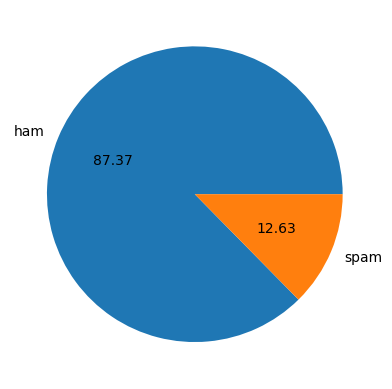

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Data is imbalanced

In [22]:
import nltk

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

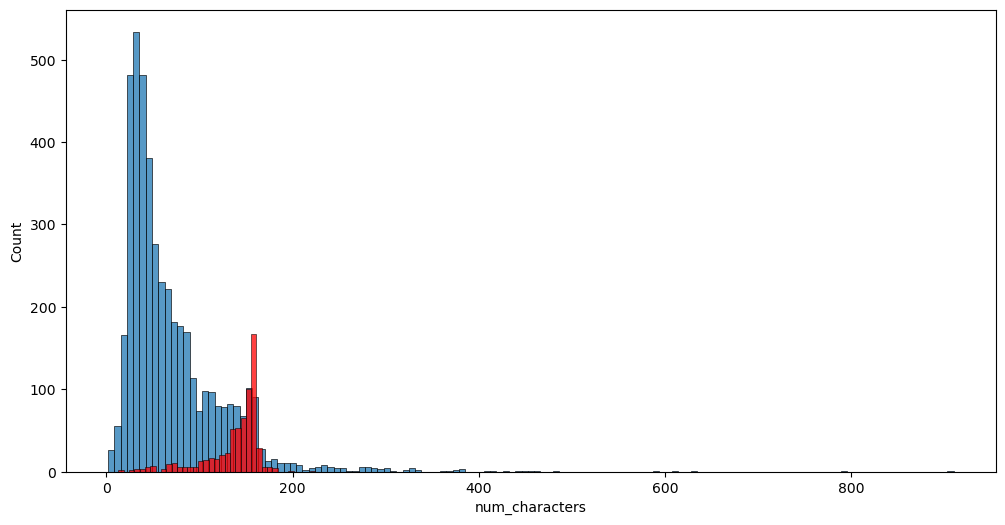

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

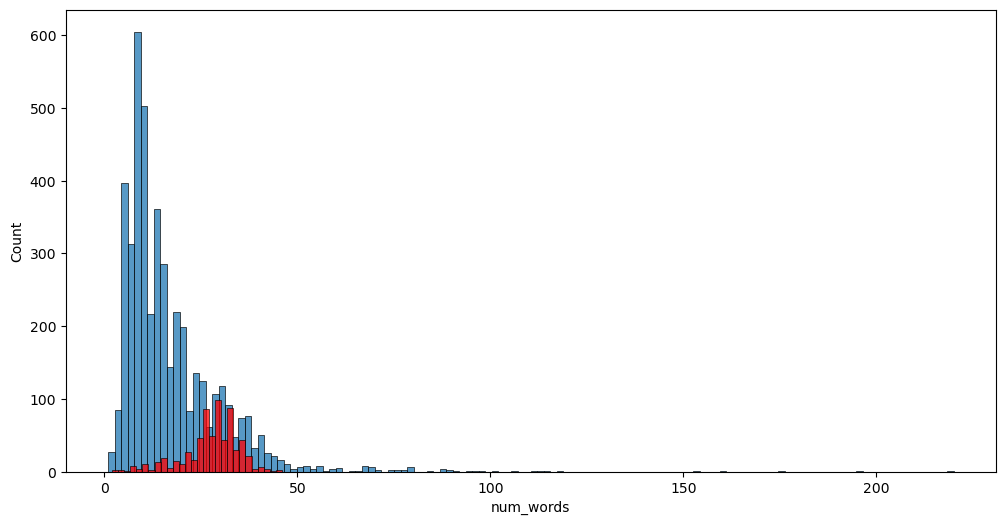

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

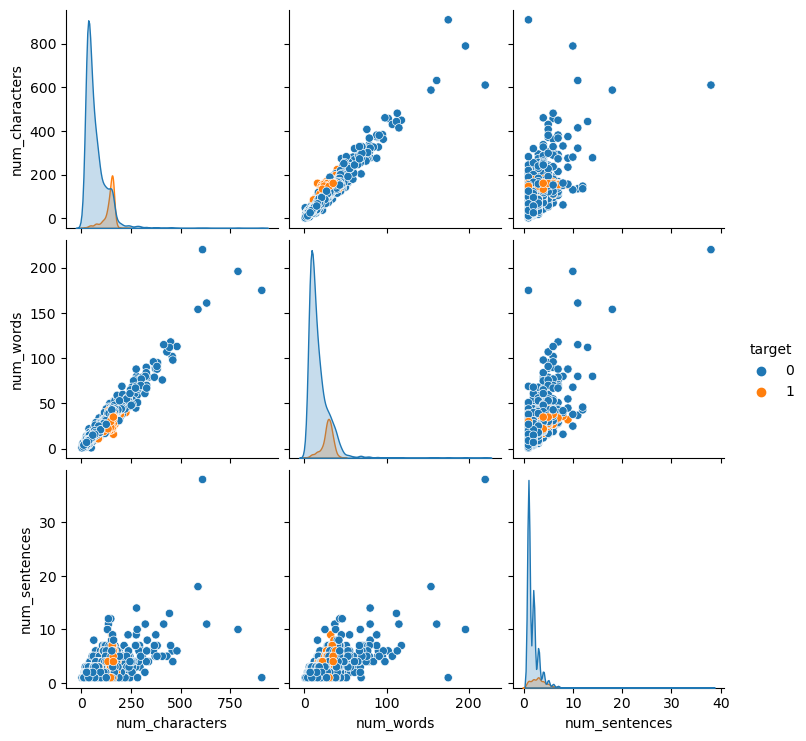

In [35]:
sns.pairplot(df,hue='target')

<Axes: >

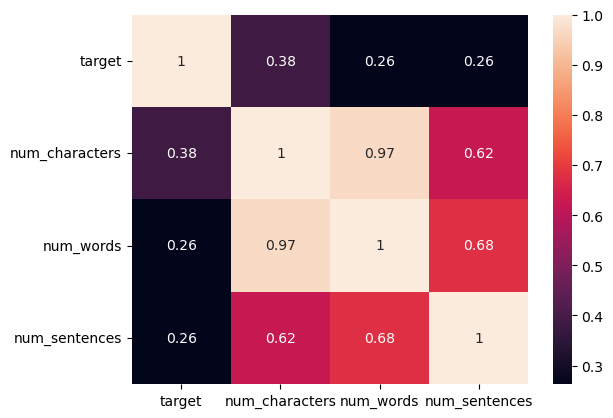

In [36]:
sns.heatmap(df.corr(numeric_only=True), annot=True)


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [37]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def transform_text(text):
    y = []
    text = text.lower().split()
    y.clear()
    
    # Initialize the PorterStemmer
    ps = PorterStemmer()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
            
    return " ".join(y)



In [38]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

"i'm gonna home soon want talk stuff anymor tonight, k? i'v cri enough today."

In [39]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [41]:
df['transformed_text'] = df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. avail bugi n great wo..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joke wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor... u c alreadi say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goe usf, live around though"


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [44]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

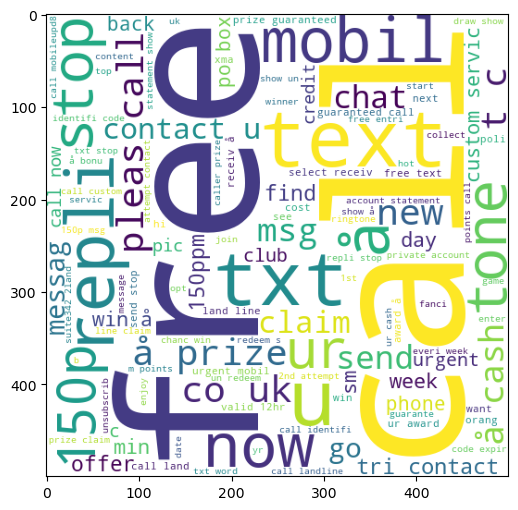

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [46]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

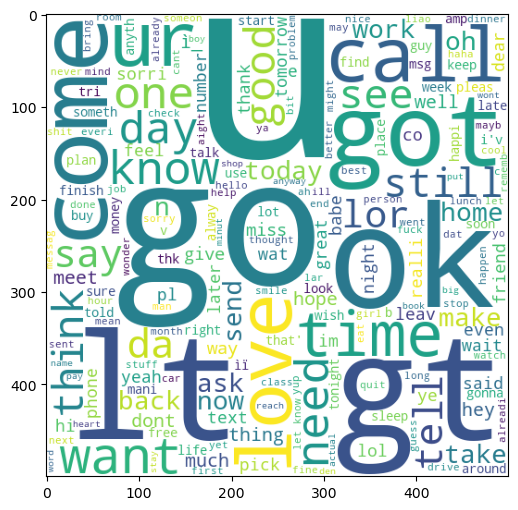

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. avail bugi n great wo..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joke wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor... u c alreadi say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goe usf, live around though"


In [49]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [50]:
len(spam_corpus)

11075

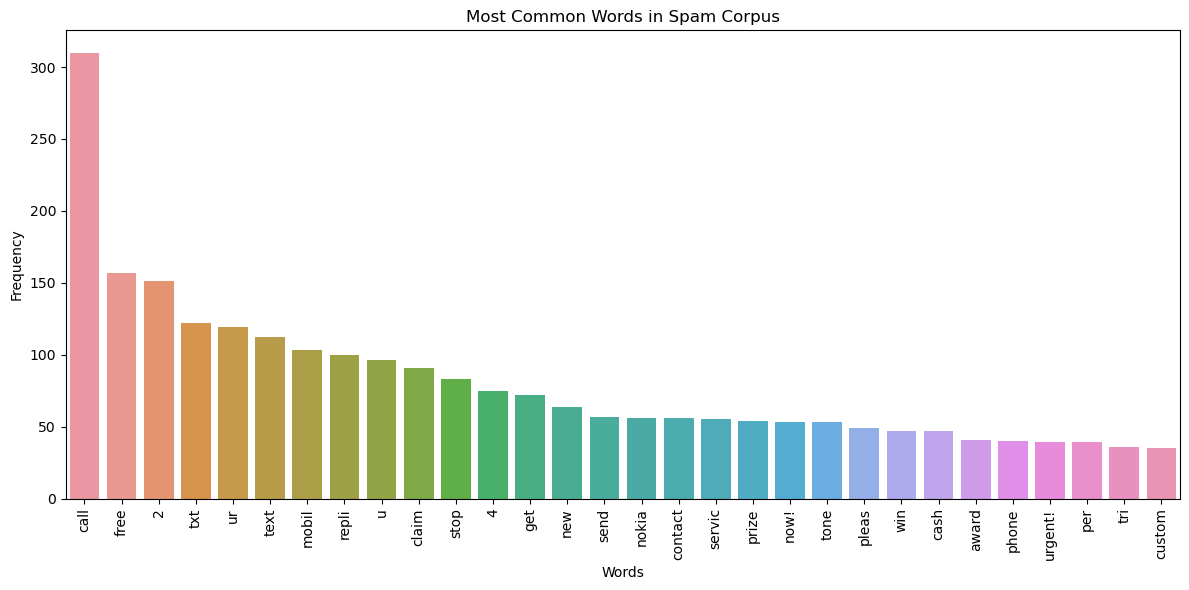

In [51]:
from collections import Counter
# Assuming 'spam_corpus' is a list of words
word_counter = Counter(spam_corpus)
most_common_words = word_counter.most_common(30)

# Create a DataFrame from the most common words
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=most_common_df)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Spam Corpus')
plt.tight_layout()
plt.show()

In [52]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)

38351

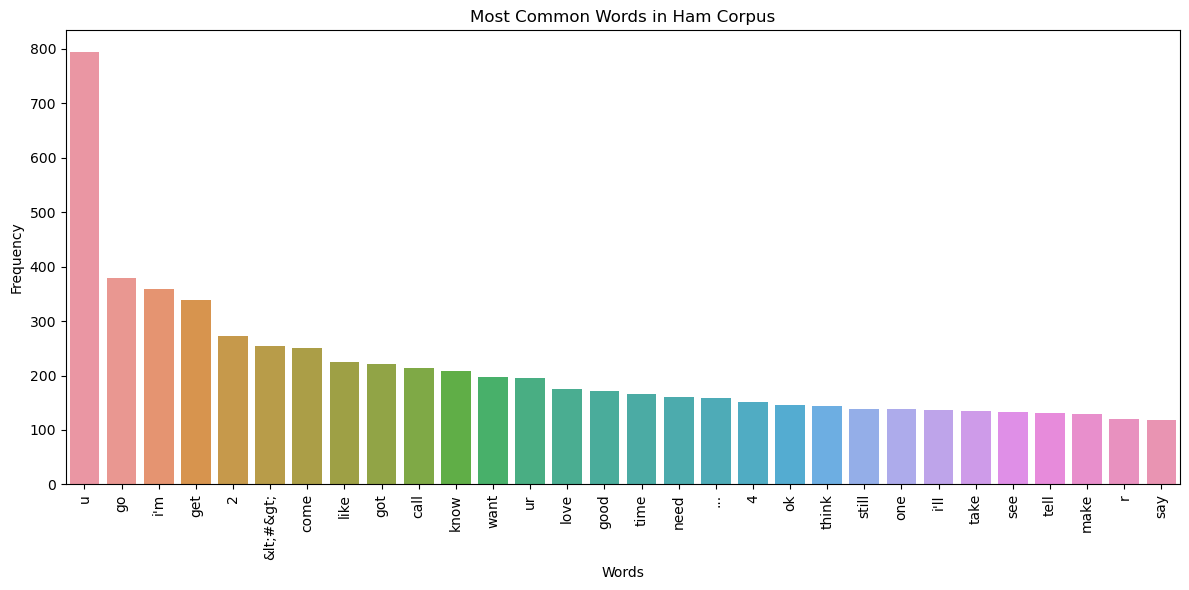

In [54]:
from collections import Counter
# Assuming 'spam_corpus' is a list of words
word_counter = Counter(ham_corpus)
most_common_words = word_counter.most_common(30)

# Create a DataFrame from the most common words
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=most_common_df)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Ham Corpus')
plt.tight_layout()
plt.show()

In [55]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. avail bugi n great wo..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joke wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor... u c alreadi say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goe usf, live around though"


## 4. Model Building

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [57]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [58]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [59]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [60]:
X.shape

(5169, 3000)

In [61]:
y = df['target'].values

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [65]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [66]:
clfs = { 
    'LR': lrc, 
    'RF': rfc,
    'xgb':xgb
}

In [67]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [68]:
from sklearn.metrics import accuracy_score,precision_score

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy -  0.9593810444874274
Precision -  0.9444444444444444
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9912280701754386
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.928


In [69]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [70]:
performance_df

,Algorithm,Accuracy,Precision
1,RF,0.974855,0.991228
0,LR,0.959381,0.944444
2,xgb,0.970019,0.928000


In [71]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [72]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.974855
1,LR,Accuracy,0.959381
2,xgb,Accuracy,0.970019
3,RF,Precision,0.991228
4,LR,Precision,0.944444
5,xgb,Precision,0.928000


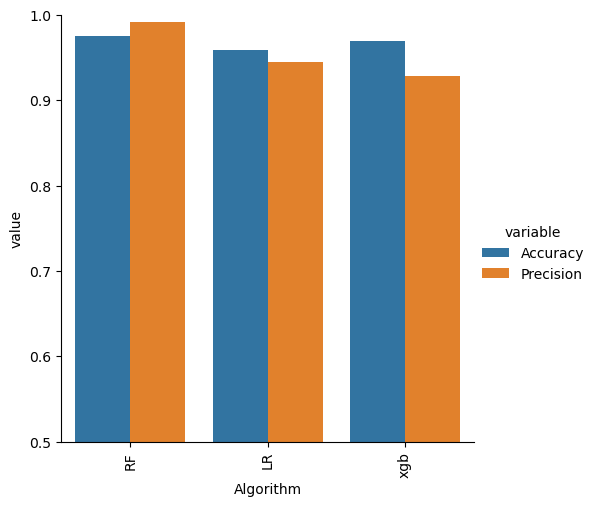

In [73]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()